In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os.path as op
import glob
import matplotlib.pyplot as plt
import ast
import csv
import random
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import scipy
import statsmodels.api as sm
import statsmodels.formula.api as smf
import os
from pandas import Timestamp
from datetime import timedelta
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('vgg_data.csv')


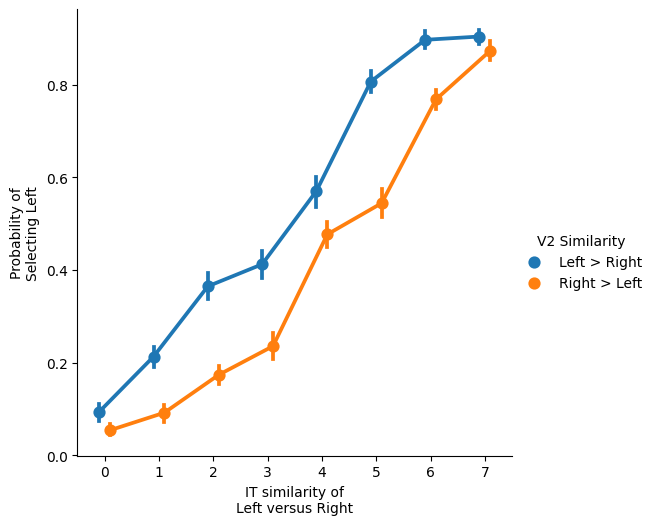

In [3]:
bins = 8  # or whatever number makes sense for your data

lr_map = {'left':-1, 'right':1}
#lr refers to im2. So 'left' means im1 is on the left
df['lr_bin'] = [lr_map[x] for x in df['left_right']]
df['IT_left_minus_right'] = [v1 * lr for lr, v1 in zip(df['lr_bin'],df['IT_im2_minus_im1'])]
df['V2_left_minus_right'] = [v1 * lr for lr, v1 in zip(df['lr_bin'],df['V2_im2_minus_im1'])]
v1_map = {True:'Left > Right', False: 'Right > Left'}
df['V2 Similarity'] = [v1_map[x >0]  for x in df['V2_left_minus_right']]
df['IT_diff_bin'] = pd.qcut(df['IT_left_minus_right'].values, bins, labels=False)
sns.catplot(x = 'IT_diff_bin',
           y = 'resp_bin',
            hue = 'V2 Similarity',
            hue_order = ['Left > Right', 'Right > Left'],
            kind = 'point',
            # unit = 'sub',
            dodge = .2,
            ci = 68,
#             col = 'decision_dur',
           data = df)
plt.ylabel('Probability of\nSelecting Left')
plt.xlabel('IT similarity of\nLeft versus Right')
plt.savefig('new_model.png')

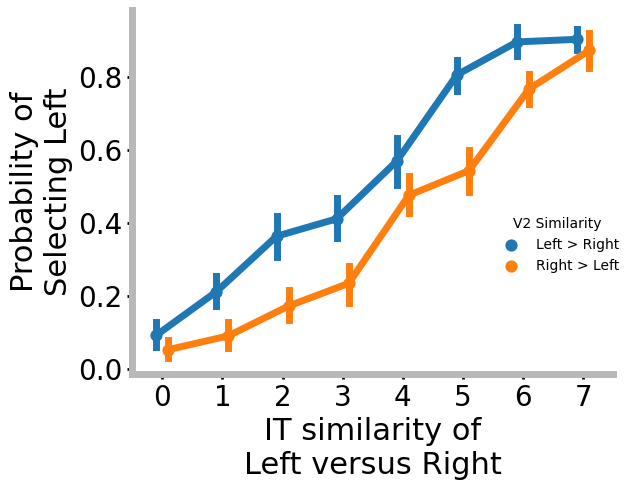

In [4]:


# Set font sizes
fontsize_labels = 22  
fontsize_ticks = 20   
fontsize_title = 16

bins = 8  # or whatever number makes sense for your data
lr_map = {'left':-1, 'right':1}
#lr refers to im2. So 'left' means im1 is on the left
df['lr_bin'] = [lr_map[x] for x in df['left_right']]
df['IT_left_minus_right'] = [v1 * lr for lr, v1 in zip(df['lr_bin'],df['IT_im2_minus_im1'])]
df['V2_left_minus_right'] = [v1 * lr for lr, v1 in zip(df['lr_bin'],df['V2_im2_minus_im1'])]
v1_map = {True:'Left > Right', False: 'Right > Left'}
df['V2 Similarity'] = [v1_map[x >0]  for x in df['V2_left_minus_right']]
df['IT_diff_bin'] = pd.qcut(df['IT_left_minus_right'].values, bins, labels=False)

# Create the plot
g = sns.catplot(x = 'IT_diff_bin',
               y = 'resp_bin',
                hue = 'V2 Similarity',
                hue_order = ['Left > Right', 'Right > Left'],
                kind = 'point',
                # unit = 'sub',
                dodge = .2,
                ci = 95,
    #             col = 'decision_dur',
               data = df)

# Access the matplotlib axes
ax = g.axes[0, 0]

# Set axis colors to #B8B8B8 and linewidth to 5
for spine in ax.spines.values():
    spine.set_color('#B8B8B8')
    spine.set_linewidth(5)

# Set tick parameters - keep ticks black but make them thicker if needed
ax.tick_params(colors='black', labelsize=fontsize_ticks, width=2)

# Set labels with specified font sizes (keep black)
ax.set_ylabel('Probability of\nSelecting Left', fontsize=fontsize_labels, color='black')
ax.set_xlabel('IT similarity of\nLeft versus Right', fontsize=fontsize_labels, color='black')

# If you want to set a title, use the title fontsize
# ax.set_title('Your Title Here', fontsize=fontsize_title, color='black')

# Modify line properties in the plot
for line in ax.lines:
    line.set_linewidth(5)


plt.tight_layout()
plt.savefig('new_model.png', dpi=300, bbox_inches='tight')
plt.show()

/var/folders/h_/pm5z54tn7rj170br8494ljz80000gn/T/ipykernel_96145/2804670826.py:62: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


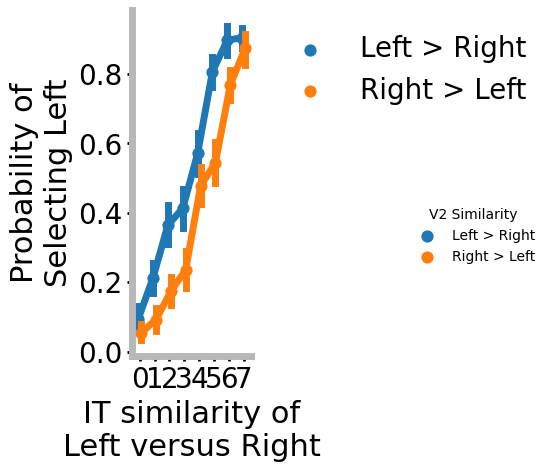

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set font sizes
fontsize_labels = 22  
fontsize_ticks = 20   
fontsize_title = 16

bins = 8  # or whatever number makes sense for your data
lr_map = {'left':-1, 'right':1}
#lr refers to im2. So 'left' means im1 is on the left
df['lr_bin'] = [lr_map[x] for x in df['left_right']]
df['IT_left_minus_right'] = [v1 * lr for lr, v1 in zip(df['lr_bin'],df['IT_im2_minus_im1'])]
df['V2_left_minus_right'] = [v1 * lr for lr, v1 in zip(df['lr_bin'],df['V2_im2_minus_im1'])]
v1_map = {True:'Left > Right', False: 'Right > Left'}
df['V2 Similarity'] = [v1_map[x >0]  for x in df['V2_left_minus_right']]
df['IT_diff_bin'] = pd.qcut(df['IT_left_minus_right'].values, bins, labels=False)

# Create the plot with a skinnier figure
g = sns.catplot(x = 'IT_diff_bin',
               y = 'resp_bin',
                hue = 'V2 Similarity',
                hue_order = ['Left > Right', 'Right > Left'],
                kind = 'point',
                # unit = 'sub',
                dodge = .2,
                errorbar=('ci', 68),  # Updated from deprecated ci parameter
    #             col = 'decision_dur',
               data = df,
               height=4,   # Controls the height
               aspect=0.5)  # Controls width relative to height (0.75 makes it skinnier)

# Access the matplotlib axes
ax = g.axes[0, 0]

# Set axis colors to #B8B8B8 and linewidth to 5
for spine in ax.spines.values():
    spine.set_color('#B8B8B8')
    spine.set_linewidth(5)

# Set tick parameters - keep ticks black but make them thicker if needed
ax.tick_params(colors='black', labelsize=fontsize_ticks, width=2)

# Set labels with specified font sizes (keep black)
ax.set_ylabel('Probability of\nSelecting Left', fontsize=fontsize_labels, color='black')
ax.set_xlabel('IT similarity of\nLeft versus Right', fontsize=fontsize_labels, color='black')

# If you want to set a title, use the title fontsize
# ax.set_title('Your Title Here', fontsize=fontsize_title, color='black')

# Modify line properties in the plot
for line in ax.lines:
    line.set_linewidth(5)

# Move legend outside the plot
handles, labels = ax.get_legend_handles_labels()
ax.legend().remove()  # Remove the default legend
ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', 
          fontsize=fontsize_ticks, frameon=False)

plt.tight_layout()
plt.savefig('new_model.png', dpi=300, bbox_inches='tight')
plt.show()

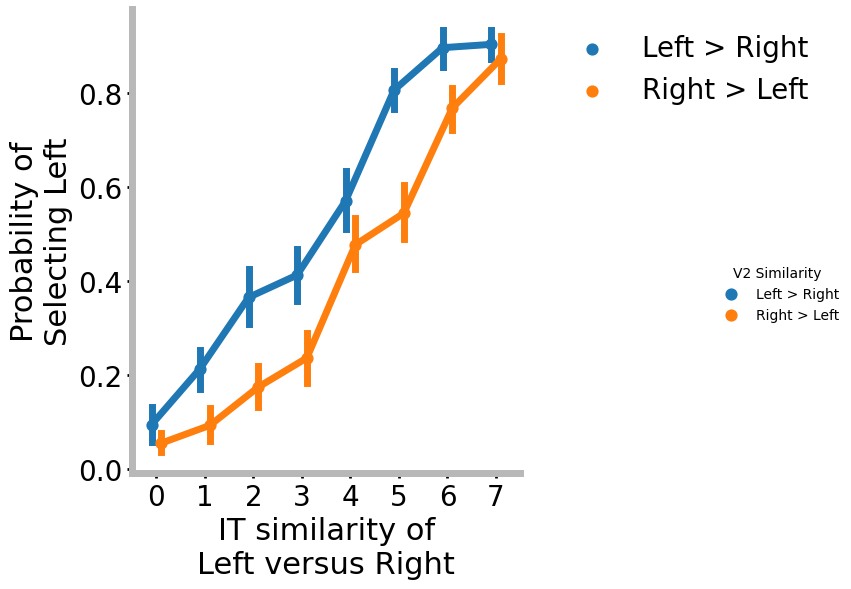

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set font sizes
fontsize_labels = 22  
fontsize_ticks = 20   
fontsize_title = 16

bins = 8  # or whatever number makes sense for your data
lr_map = {'left':-1, 'right':1}
#lr refers to im2. So 'left' means im1 is on the left
df['lr_bin'] = [lr_map[x] for x in df['left_right']]
df['IT_left_minus_right'] = [v1 * lr for lr, v1 in zip(df['lr_bin'],df['IT_im2_minus_im1'])]
df['V2_left_minus_right'] = [v1 * lr for lr, v1 in zip(df['lr_bin'],df['V2_im2_minus_im1'])]
v1_map = {True:'Left > Right', False: 'Right > Left'}
df['V2 Similarity'] = [v1_map[x >0]  for x in df['V2_left_minus_right']]
df['IT_diff_bin'] = pd.qcut(df['IT_left_minus_right'].values, bins, labels=False)

# Create the plot with a skinnier figure
g = sns.catplot(x = 'IT_diff_bin',
               y = 'resp_bin',
                hue = 'V2 Similarity',
                hue_order = ['Left > Right', 'Right > Left'],
                kind = 'point',
                # unit = 'sub',
                dodge = .2,
                errorbar=('ci', 68),  # Updated from deprecated ci parameter
    #             col = 'decision_dur',
               data = df,
               height=6,   # Controls the height
               aspect=1.2)  # Increased aspect ratio to make it less skinny

# Access the matplotlib axes
ax = g.axes[0, 0]

# Set axis colors to #B8B8B8 and linewidth to 5
for spine in ax.spines.values():
    spine.set_color('#B8B8B8')
    spine.set_linewidth(5)

# Set tick parameters - keep ticks black but make them thicker if needed
ax.tick_params(colors='black', labelsize=fontsize_ticks, width=2)

# Set labels with specified font sizes (keep black)
ax.set_ylabel('Probability of\nSelecting Left', fontsize=fontsize_labels, color='black')
ax.set_xlabel('IT similarity of\nLeft versus Right', fontsize=fontsize_labels, color='black')

# If you want to set a title, use the title fontsize
# ax.set_title('Your Title Here', fontsize=fontsize_title, color='black')

# Modify line properties in the plot
for line in ax.lines:
    line.set_linewidth(5)

# Move legend outside the plot
handles, labels = ax.get_legend_handles_labels()
ax.legend().remove()  # Remove the default legend
ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', 
          fontsize=fontsize_ticks, frameon=False)

plt.tight_layout()
plt.savefig('new_model.png', dpi=300, bbox_inches='tight')
plt.show()

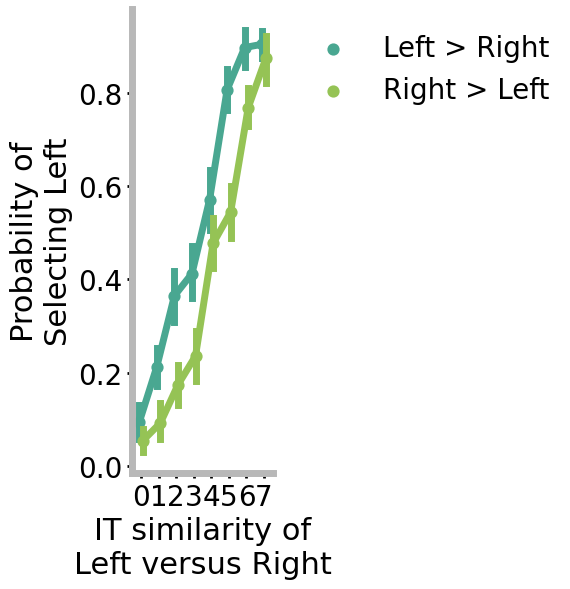

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set font sizes
fontsize_labels = 22  
fontsize_ticks = 20   
fontsize_title = 16

bins = 8  # or whatever number makes sense for your data
lr_map = {'left':-1, 'right':1}
#lr refers to im2. So 'left' means im1 is on the left
df['lr_bin'] = [lr_map[x] for x in df['left_right']]
df['IT_left_minus_right'] = [v1 * lr for lr, v1 in zip(df['lr_bin'],df['IT_im2_minus_im1'])]
df['V2_left_minus_right'] = [v1 * lr for lr, v1 in zip(df['lr_bin'],df['V2_im2_minus_im1'])]
v1_map = {True:'Left > Right', False: 'Right > Left'}
df['V2 Similarity'] = [v1_map[x >0]  for x in df['V2_left_minus_right']]
df['IT_diff_bin'] = pd.qcut(df['IT_left_minus_right'].values, bins, labels=False)

# Create the plot with a skinnier figure
teal = '#49a791'
green = '#95c355'
custom_palette = {'Left > Right': teal, 'Right > Left': green}

g = sns.catplot(x = 'IT_diff_bin',
               y = 'resp_bin',
                hue = 'V2 Similarity',
                hue_order = ['Left > Right', 'Right > Left'],
                palette = custom_palette,  # Use custom colors
                kind = 'point',
                # unit = 'sub',
                dodge = .2,
                errorbar=('ci', 68),  # Updated from deprecated ci parameter
    #             col = 'decision_dur',
               data = df,
               height=6,   # Controls the height
               aspect=1,  # Increased aspect ratio to make it less skinny
               legend=False)  # Disable seaborn's automatic legend

# Access the matplotlib axes
ax = g.axes[0, 0]

# Set axis colors to #B8B8B8 and linewidth to 5
for spine in ax.spines.values():
    spine.set_color('#B8B8B8')
    spine.set_linewidth(5)

# Set tick parameters - keep ticks black but make them thicker if needed
ax.tick_params(colors='black', labelsize=fontsize_ticks, width=2)

# Set labels with specified font sizes (keep black)
ax.set_ylabel('Probability of\nSelecting Left', fontsize=fontsize_labels, color='black')
ax.set_xlabel('IT similarity of\nLeft versus Right', fontsize=fontsize_labels, color='black')

# If you want to set a title, use the title fontsize
# ax.set_title('Your Title Here', fontsize=fontsize_title, color='black')

# Modify line properties in the plot
for line in ax.lines:
    line.set_linewidth(5)

# Move legend outside the plot
handles, labels = ax.get_legend_handles_labels()
# Create the legend outside the plot area
ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', 
          fontsize=fontsize_ticks, frameon=False)

# ax.legend().remove()  # Remove the default legend
# ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', 
#           fontsize=fontsize_ticks, frameon=False)

plt.tight_layout()
plt.savefig('new_model.png', dpi=300, bbox_inches='tight')
plt.show()

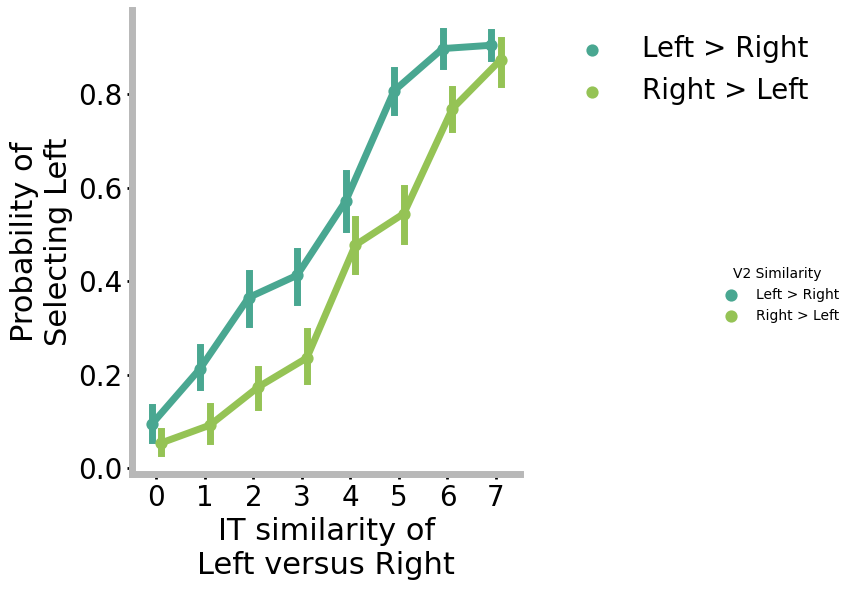

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set font sizes
fontsize_labels = 22  
fontsize_ticks = 20   
fontsize_title = 16

bins = 8  # or whatever number makes sense for your data
lr_map = {'left':-1, 'right':1}
#lr refers to im2. So 'left' means im1 is on the left
df['lr_bin'] = [lr_map[x] for x in df['left_right']]
df['IT_left_minus_right'] = [v1 * lr for lr, v1 in zip(df['lr_bin'],df['IT_im2_minus_im1'])]
df['V2_left_minus_right'] = [v1 * lr for lr, v1 in zip(df['lr_bin'],df['V2_im2_minus_im1'])]
v1_map = {True:'Left > Right', False: 'Right > Left'}
df['V2 Similarity'] = [v1_map[x >0]  for x in df['V2_left_minus_right']]
df['IT_diff_bin'] = pd.qcut(df['IT_left_minus_right'].values, bins, labels=False)

# Create the plot with a skinnier figure
teal = '#49a791'
green = '#95c355'
custom_palette = {'Left > Right': teal, 'Right > Left': green}

g = sns.catplot(x = 'IT_diff_bin',
               y = 'resp_bin',
                hue = 'V2 Similarity',
                hue_order = ['Left > Right', 'Right > Left'],
                palette = custom_palette,  # Use custom colors
                kind = 'point',
                # unit = 'sub',
                dodge = .2,
                errorbar=('ci', 68),  # Updated from deprecated ci parameter
    #             col = 'decision_dur',
               data = df,
               height=6,   # Controls the height
               aspect=1.2)  # Increased aspect ratio to make it less skinny

# Access the matplotlib axes
ax = g.axes[0, 0]

# Set axis colors to #B8B8B8 and linewidth to 5
for spine in ax.spines.values():
    spine.set_color('#B8B8B8')
    spine.set_linewidth(5)

# Set tick parameters - keep ticks black but make them thicker if needed
ax.tick_params(colors='black', labelsize=fontsize_ticks, width=2)

# Set labels with specified font sizes (keep black)
ax.set_ylabel('Probability of\nSelecting Left', fontsize=fontsize_labels, color='black')
ax.set_xlabel('IT similarity of\nLeft versus Right', fontsize=fontsize_labels, color='black')

# If you want to set a title, use the title fontsize
# ax.set_title('Your Title Here', fontsize=fontsize_title, color='black')

# Modify line properties in the plot
for line in ax.lines:
    line.set_linewidth(5)

# Move legend outside the plot
handles, labels = ax.get_legend_handles_labels()
# Create the legend outside the plot area
ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', 
          fontsize=fontsize_ticks, frameon=False)

plt.tight_layout()
plt.savefig('new_model.png', dpi=300, bbox_inches='tight')
plt.show()

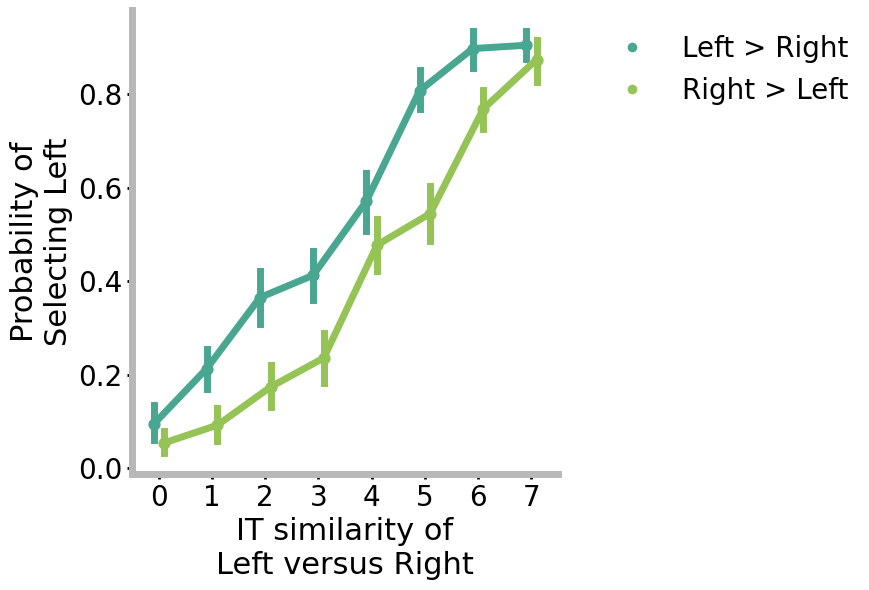

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set font sizes
fontsize_labels = 22  
fontsize_ticks = 20   
fontsize_title = 16

bins = 8  # or whatever number makes sense for your data
lr_map = {'left':-1, 'right':1}
#lr refers to im2. So 'left' means im1 is on the left
df['lr_bin'] = [lr_map[x] for x in df['left_right']]
df['IT_left_minus_right'] = [v1 * lr for lr, v1 in zip(df['lr_bin'],df['IT_im2_minus_im1'])]
df['V2_left_minus_right'] = [v1 * lr for lr, v1 in zip(df['lr_bin'],df['V2_im2_minus_im1'])]
v1_map = {True:'Left > Right', False: 'Right > Left'}
df['V2 Similarity'] = [v1_map[x >0]  for x in df['V2_left_minus_right']]
df['IT_diff_bin'] = pd.qcut(df['IT_left_minus_right'].values, bins, labels=False)

# Create the plot with a skinnier figure
teal = '#49a791'
green = '#95c355'
custom_palette = {'Left > Right': teal, 'Right > Left': green}

g = sns.catplot(x = 'IT_diff_bin',
               y = 'resp_bin',
                hue = 'V2 Similarity',
                hue_order = ['Left > Right', 'Right > Left'],
                palette = custom_palette,  # Use custom colors
                kind = 'point',
                # unit = 'sub',
                dodge = .2,
                errorbar=('ci', 68),  # Updated from deprecated ci parameter
    #             col = 'decision_dur',
               data = df,
               height=6,   # Controls the height
               aspect=1.5,  # Increased aspect ratio to make it wider
               legend=False)  # Disable seaborn's automatic legend

# Access the matplotlib axes
ax = g.axes[0, 0]

# Set axis colors to #B8B8B8 and linewidth to 5
for spine in ax.spines.values():
    spine.set_color('#B8B8B8')
    spine.set_linewidth(5)

# Set tick parameters - keep ticks black but make them thicker if needed
ax.tick_params(colors='black', labelsize=fontsize_ticks, width=2)

# Set labels with specified font sizes (keep black)
ax.set_ylabel('Probability of\nSelecting Left', fontsize=fontsize_labels, color='black')
ax.set_xlabel('IT similarity of\nLeft versus Right', fontsize=fontsize_labels, color='black')

# If you want to set a title, use the title fontsize
# ax.set_title('Your Title Here', fontsize=fontsize_title, color='black')

# Modify line properties in the plot
for line in ax.lines:
    line.set_linewidth(5)

# Create manual legend outside the plot
from matplotlib.lines import Line2D
legend_elements = [Line2D([0], [0], marker='o', color='w', markerfacecolor=teal, 
                         markersize=8, label='Left > Right'),
                   Line2D([0], [0], marker='o', color='w', markerfacecolor=green, 
                         markersize=8, label='Right > Left')]
ax.legend(handles=legend_elements, bbox_to_anchor=(1.05, 1), loc='upper left', 
          fontsize=fontsize_ticks, frameon=False)

plt.tight_layout()
plt.savefig('new_model.png', dpi=300, bbox_inches='tight')
plt.show()

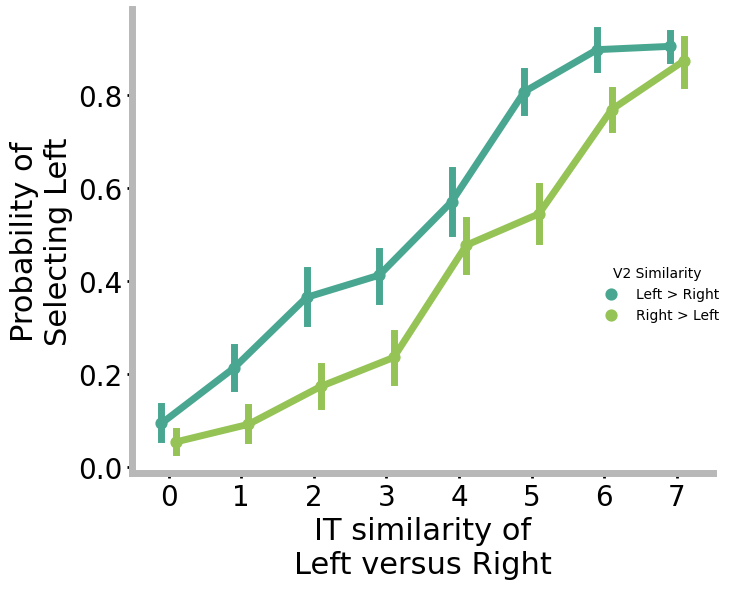

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set font sizes
fontsize_labels = 22  
fontsize_ticks = 20   
fontsize_title = 16

bins = 8  # or whatever number makes sense for your data
lr_map = {'left':-1, 'right':1}
#lr refers to im2. So 'left' means im1 is on the left
df['lr_bin'] = [lr_map[x] for x in df['left_right']]
df['IT_left_minus_right'] = [v1 * lr for lr, v1 in zip(df['lr_bin'],df['IT_im2_minus_im1'])]
df['V2_left_minus_right'] = [v1 * lr for lr, v1 in zip(df['lr_bin'],df['V2_im2_minus_im1'])]
v1_map = {True:'Left > Right', False: 'Right > Left'}
df['V2 Similarity'] = [v1_map[x >0]  for x in df['V2_left_minus_right']]
df['IT_diff_bin'] = pd.qcut(df['IT_left_minus_right'].values, bins, labels=False)

# Create the plot with a skinnier figure
teal = '#49a791'
green = '#95c355'
custom_palette = {'Left > Right': teal, 'Right > Left': green}

g = sns.catplot(x = 'IT_diff_bin',
               y = 'resp_bin',
                hue = 'V2 Similarity',
                hue_order = ['Left > Right', 'Right > Left'],
                palette = custom_palette,  # Use custom colors
                kind = 'point',
                # unit = 'sub',
                dodge = .2,
                errorbar=('ci', 68),  # Updated from deprecated ci parameter
    #             col = 'decision_dur',
               data = df,
               height=6,   # Controls the height
               aspect=1)  # Increased aspect ratio to make it wider

# Access the matplotlib axes
ax = g.axes[0, 0]

# Set axis colors to #B8B8B8 and linewidth to 5
for spine in ax.spines.values():
    spine.set_color('#B8B8B8')
    spine.set_linewidth(5)

# Set tick parameters - keep ticks black but make them thicker if needed
ax.tick_params(colors='black', labelsize=fontsize_ticks, width=2)

# Set labels with specified font sizes (keep black)
ax.set_ylabel('Probability of\nSelecting Left', fontsize=fontsize_labels, color='black')
ax.set_xlabel('IT similarity of\nLeft versus Right', fontsize=fontsize_labels, color='black')

# If you want to set a title, use the title fontsize
# ax.set_title('Your Title Here', fontsize=fontsize_title, color='black')

# Modify line properties in the plot
for line in ax.lines:
    line.set_linewidth(5)

# Move the original seaborn legend outside the plot
legend = ax.get_legend()
if legend:
    legend.set_bbox_to_anchor((1.05, 1))
    legend.set_loc('upper left')
    for text in legend.get_texts():
        text.set_fontsize(fontsize_ticks)

plt.tight_layout()
plt.savefig('new_model.png', dpi=300, bbox_inches='tight')
plt.show()

AttributeError: 'NoneType' object has no attribute 'remove'

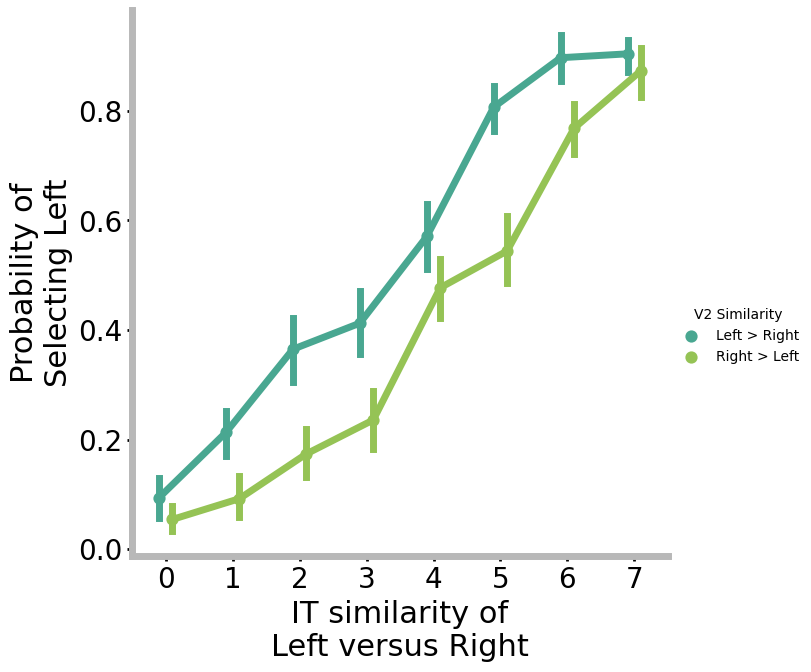

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set font sizes
fontsize_labels = 22  
fontsize_ticks = 20   
fontsize_title = 16

bins = 8  # or whatever number makes sense for your data
lr_map = {'left':-1, 'right':1}
#lr refers to im2. So 'left' means im1 is on the left
df['lr_bin'] = [lr_map[x] for x in df['left_right']]
df['IT_left_minus_right'] = [v1 * lr for lr, v1 in zip(df['lr_bin'],df['IT_im2_minus_im1'])]
df['V2_left_minus_right'] = [v1 * lr for lr, v1 in zip(df['lr_bin'],df['V2_im2_minus_im1'])]
v1_map = {True:'Left > Right', False: 'Right > Left'}
df['V2 Similarity'] = [v1_map[x >0]  for x in df['V2_left_minus_right']]
df['IT_diff_bin'] = pd.qcut(df['IT_left_minus_right'].values, bins, labels=False)

# Create the plot with a skinnier figure
teal = '#49a791'
green = '#95c355'
custom_palette = {'Left > Right': teal, 'Right > Left': green}

g = sns.catplot(x = 'IT_diff_bin',
               y = 'resp_bin',
                hue = 'V2 Similarity',
                hue_order = ['Left > Right', 'Right > Left'],
                palette = custom_palette,  # Use custom colors
                kind = 'point',
                # unit = 'sub',
                dodge = .2,
                errorbar=('ci', 68),  # Updated from deprecated ci parameter
    #             col = 'decision_dur',
               data = df,
               height=6,   # Controls the height
               aspect=1)  # Adjusted aspect ratio

# Access the matplotlib axes
ax = g.axes[0, 0]

# Set axis colors to #B8B8B8 and linewidth to 5
for spine in ax.spines.values():
    spine.set_color('#B8B8B8')
    spine.set_linewidth(5)

# Set tick parameters - keep ticks black but make them thicker if needed
ax.tick_params(colors='black', labelsize=fontsize_ticks, width=2)

# Set labels with specified font sizes (keep black)
ax.set_ylabel('Probability of\nSelecting Left', fontsize=fontsize_labels, color='black')
ax.set_xlabel('IT similarity of\nLeft versus Right', fontsize=fontsize_labels, color='black')

# If you want to set a title, use the title fontsize
# ax.set_title('Your Title Here', fontsize=fontsize_title, color='black')

# Modify line properties in the plot
for line in ax.lines:
    line.set_linewidth(5)

# Move seaborn's legend outside the plot
handles, labels = ax.get_legend_handles_labels()
ax.get_legend().remove()  # Remove the default legend
ax.legend(handles, labels, bbox_to_anchor=(1.05, 1), loc='upper left', 
          fontsize=fontsize_ticks, frameon=False)

plt.tight_layout()
plt.savefig('new_model.png', dpi=300, bbox_inches='tight')
plt.show()

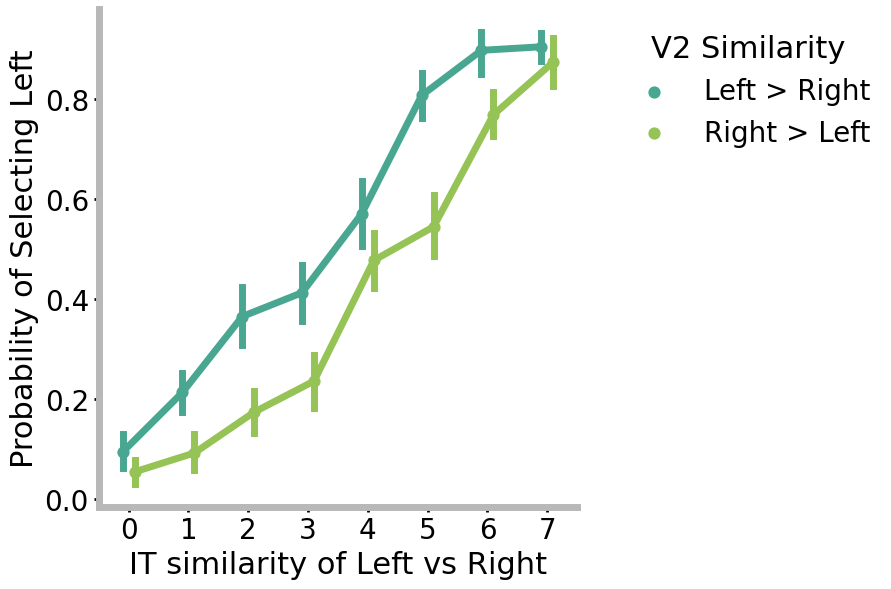

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set font sizes
fontsize_labels = 22  
fontsize_ticks = 20   
fontsize_title = 22

bins = 8  # or whatever number makes sense for your data
lr_map = {'left':-1, 'right':1}
#lr refers to im2. So 'left' means im1 is on the left
df['lr_bin'] = [lr_map[x] for x in df['left_right']]
df['IT_left_minus_right'] = [v1 * lr for lr, v1 in zip(df['lr_bin'],df['IT_im2_minus_im1'])]
df['V2_left_minus_right'] = [v1 * lr for lr, v1 in zip(df['lr_bin'],df['V2_im2_minus_im1'])]
v1_map = {True:'Left > Right', False: 'Right > Left'}
df['V2 Similarity'] = [v1_map[x >0]  for x in df['V2_left_minus_right']]
df['IT_diff_bin'] = pd.qcut(df['IT_left_minus_right'].values, bins, labels=False)

# Create the plot with a skinnier figure
teal = '#49a791'
green = '#95c355'
custom_palette = {'Left > Right': teal, 'Right > Left': green}

g = sns.catplot(x = 'IT_diff_bin',
               y = 'resp_bin',
                hue = 'V2 Similarity',
                hue_order = ['Left > Right', 'Right > Left'],
                palette = custom_palette,  # Use custom colors
                kind = 'point',
                # unit = 'sub',
                dodge = .2,
                errorbar=('ci', 68),  # Updated from deprecated ci parameter
    #             col = 'decision_dur',
               data = df,
               height=6,   # Controls the height
               aspect=1.3)  # Adjusted aspect ratio

# Access the matplotlib axes
ax = g.axes[0, 0]

# Set axis colors to #B8B8B8 and linewidth to 5
for spine in ax.spines.values():
    spine.set_color('#B8B8B8')
    spine.set_linewidth(5)

# Set tick parameters - keep ticks black but make them thicker if needed
ax.tick_params(colors='black', labelsize=fontsize_ticks, width=2)

# Set labels with specified font sizes (keep black)
ax.set_ylabel('Probability of Selecting Left', fontsize=fontsize_labels, color='black')
ax.set_xlabel('IT similarity of Left vs Right', fontsize=fontsize_labels, color='black')

# If you want to set a title, use the title fontsize
# ax.set_title('Your Title Here', fontsize=fontsize_title, color='black')

# Modify line properties in the plot
for line in ax.lines:
    line.set_linewidth(5)

# Move seaborn's legend outside the plot
handles, labels = ax.get_legend_handles_labels()
# Remove seaborn's figure-level legend
g._legend.remove()
# Create new legend at axes level, positioned outside
legend = ax.legend(handles, labels, title='V2 Similarity', bbox_to_anchor=(1.05, 1), loc='upper left', 
                   fontsize=fontsize_ticks, frameon=False)
# Set the legend title font size
legend.get_title().set_fontsize(fontsize_title)

plt.tight_layout()
plt.savefig('new_model.png', dpi=300, bbox_inches='tight')
plt.show()

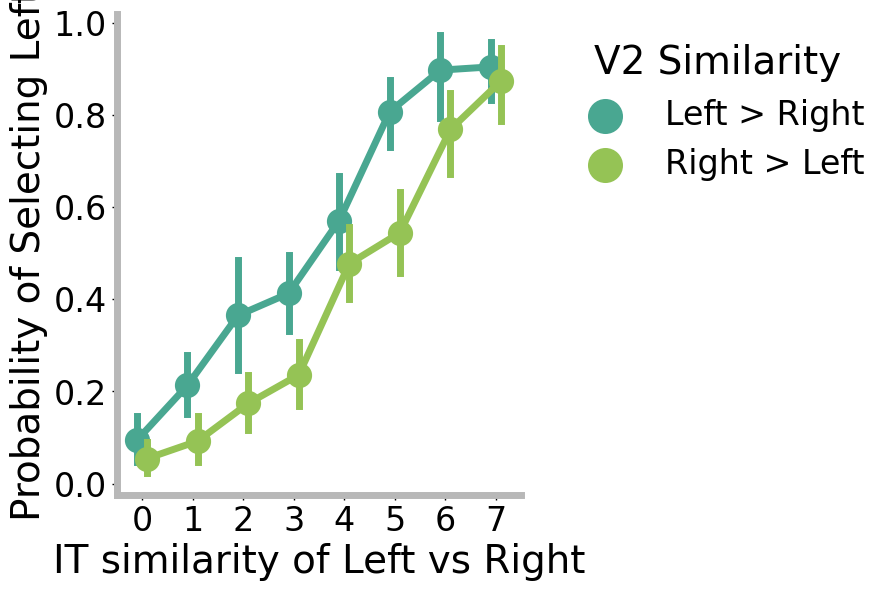

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Set font sizes - increased from original
fontsize_labels = 28  # was 22
fontsize_ticks = 24   # was 20
fontsize_title = 28   # was 22

bins = 8  # or whatever number makes sense for your data
lr_map = {'left':-1, 'right':1}
#lr refers to im2. So 'left' means im1 is on the left
df['lr_bin'] = [lr_map[x] for x in df['left_right']]
df['IT_left_minus_right'] = [v1 * lr for lr, v1 in zip(df['lr_bin'],df['IT_im2_minus_im1'])]
df['V2_left_minus_right'] = [v1 * lr for lr, v1 in zip(df['lr_bin'],df['V2_im2_minus_im1'])]

v1_map = {True:'Left > Right', False: 'Right > Left'}
df['V2 Similarity'] = [v1_map[x >0]  for x in df['V2_left_minus_right']]
df['IT_diff_bin'] = pd.qcut(df['IT_left_minus_right'].values, bins, labels=False)

# Create the plot with a skinnier figure
teal = '#49a791'
green = '#95c355'
custom_palette = {'Left > Right': teal, 'Right > Left': green}

g = sns.catplot(x='IT_diff_bin',
                y='resp_bin',
                hue='V2 Similarity',
                hue_order=['Left > Right', 'Right > Left'],
                palette=custom_palette,  # Use custom colors
                kind='point',
                units = 'sub',
                dodge=.2,
                errorbar=('ci', 33),  # Updated from deprecated ci parameter
                markersize=15,  # Make points bigger (replaces deprecated scale)
                linewidth=8,    # Make connecting lines thicker
    #             col = 'decision_dur',
                data=df,
                height=6,   # Controls the height
                aspect=1.3)  # Adjusted aspect ratio

# Access the matplotlib axes
ax = g.axes[0, 0]

# Set axis colors to #B8B8B8 and linewidth to 5
for spine in ax.spines.values():
    spine.set_color('#B8B8B8')
    spine.set_linewidth(5)

# Set tick parameters - keep ticks black but make them thicker if needed
ax.tick_params(colors='black', labelsize=fontsize_ticks, width=1)  # Increased width from 2 to 3

# Set labels with specified font sizes (keep black)
ax.set_ylabel('Probability of Selecting Left', fontsize=fontsize_labels, color='black')
ax.set_xlabel('IT similarity of Left vs Right', fontsize=fontsize_labels, color='black')

# If you want to set a title, use the title fontsize
# ax.set_title('Your Title Here', fontsize=fontsize_title, color='black')

# Modify line properties in the plot - make lines heavier
for line in ax.lines:
    line.set_linewidth(5)  # Increased from 5 to 8

# Make error bars thicker and points bigger
for collection in ax.collections:
    if hasattr(collection, 'set_linewidth'):
        collection.set_linewidth(4)  # Make error bars thicker
    if hasattr(collection, 'set_sizes'):
        collection.set_sizes([200])  # Make scatter points bigger

# Also make the error bar caps thicker
for line in ax.lines:
    if line.get_linestyle() == '-':  # This targets the error bar caps
        line.set_linewidth(5)
        line.set_markeredgewidth(2)
    # Make the actual data points bigger
    line.set_markersize(6)  # Increase marker size (default is usually 6)

# Move seaborn's legend outside the plot
handles, labels = ax.get_legend_handles_labels()
# Remove seaborn's figure-level legend
g._legend.remove()

# Create new legend at axes level, positioned outside
legend = ax.legend(handles, labels, title='V2 Similarity', bbox_to_anchor=(1.05, 1), loc='upper left', 
                   fontsize=fontsize_ticks, frameon=False, markerscale=1.5)  # Added markerscale to make legend markers bigger

# Set the legend title font size
legend.get_title().set_fontsize(fontsize_title)

plt.tight_layout()
plt.savefig('new_model.png', dpi=300, bbox_inches='tight')
plt.show()

In [14]:
# !pip install seaborn==0.11
#!pip install ptitprince